**<center> <span style="color:green;font-family:serif; font-size:32px;">History Of Ancient Empires 🌏📊</span> </center>**

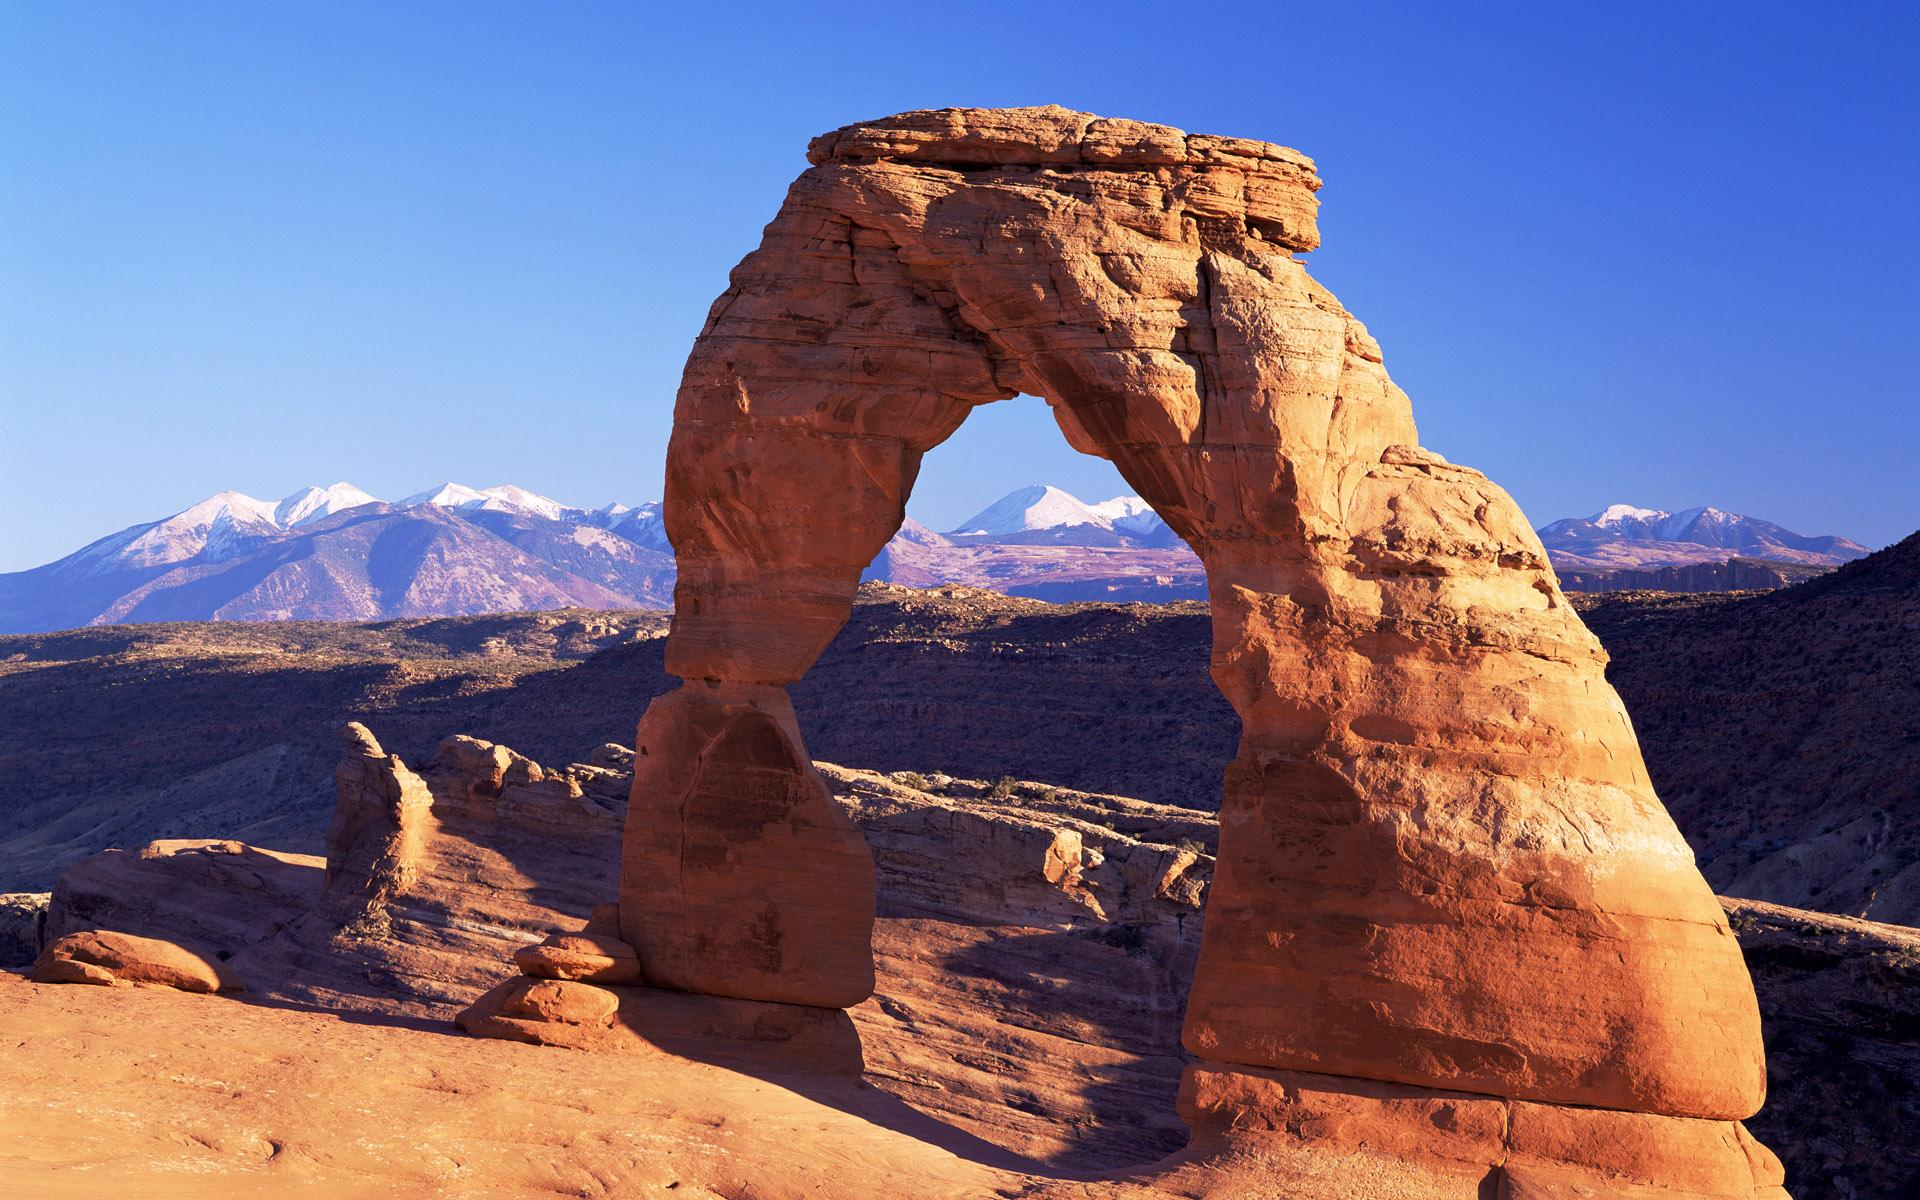

The Axial Age dataset tracks a variety of sociopolitical norms and their development across key areas in Afro-Eurasia. The specific scores for each sociopolitical norm for each date (varying time spans between 5300 BCE and 1800 CE in 100 year increments) within 10 NGAs (natural geographic area) were agreed-upon by a group of experts and compiled into the dataset.

### **So What Was the Axial Age?**
The Axial Age (also known as the Axis Age) is the era when the  great intellectual, philosophical, and religious systems that came to form subsequent human civilization and culture appeared, much of the inhabited world at about the same time.

___

# <span style="font-family:serif; font-size:28px;"> 1. Importing libraries and reading data</span>

In [ ]:
# Import all of the necessary packages.
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.pyplot import stackplot

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read in the data from CSV file.
df = pd.read_csv("../input/axial-age-dataset/AxialAgeDataset.csv")

___

# <span style="font-family:serif; font-size:28px;"> 2. Quick look at the data</span>

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

We can see that we have 428 rows and 15 columns. We can also take a glance at the Data types of all the columns. If you notice the Not Null Count, we can observe that we definately have missing values in our data. Let's dive deeper into the missing values and analyse them.

In [ ]:
df.describe()

___

# <span style="font-family:serif; font-size:28px;"> 3. Visualize missing values </span>


In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

> **Using this matrix you can very quickly find the pattern of missingness in the dataset.
From the above visualisation we can observe that this particular dataset has a lot of missing  values. Looking at the pattern, we can see that most columns have similar pattern of missingness except for Equating elites and commoners and Equating rulers and commoners columns.**

In [ ]:
# Visualize the number of missing values as a bar chart
msno.bar(df);

> **This bar chart gives you an idea about how many missing values are there in each column.**


In [ ]:
# Visualize the correlation between the number of missing values in different columns as a heatmap
msno.heatmap(df);

> **Heatmap shows the correlation of missingness between every 2 columns. A value near 0 means there is no dependence between the occurrence of missing values of two variables.**

In [ ]:
msno.dendrogram(df);

> **The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap. To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. The height of the cluster leaf tells you, in absolute terms, how often the records are "mismatched" or incorrectly filed—that is, how many values you would have to fill in or drop, if you are so inclined.**

___

# <span style="font-family:serif; font-size:28px;"> 4. Data Cleaning </span>

Lets check how many null values are there in the data

In [ ]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

In [ ]:
#Detect missing values
df.isna().sum()

In [ ]:
# Create a text preprocessing function


def text_preprocess(str):
    """ This function removes numbers and periods, 
    replaces spaces and dashes with underscores, and lowercases letters
    for easier coding and top keep text in compliance with PEP-8 formatting.
    
    Parameters:
    INPUTS:
    str (str): This is the text to be preprocessed.
    
    OUTPUTS:
    str : This is the fully preprocessed string.
    """
    
    str = str.lstrip('0123456789. ')
    str = re.sub(r"\s+", '_', str)
    str = re.sub(r"[\-.]", '_', str)
    str = str.lower()
    return str


# Apply the text preprocessing tool to column names and the contents
# of the nga column.
df.columns = df.columns.to_series().apply(text_preprocess)
df["nga"] = df["nga"].map(text_preprocess)

# Check that the preprocessing worked.
print("RegExed Columns:\n" + str(df.columns))
print("\nRegExed NGAs:\n" + str(df.nga.unique()))

Let's replace the NaN values in the dataset with zero since that seems the most appropriate
for overall data.

In [ ]:
# Replace NaN values in the dataframe with 0.
df = df.fillna(0)

### Let's check the clean data

In [ ]:
df.isna().sum()

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
# Check the summary statistics of the date_from column.
df_subset=df["date_from"]
df_subset.describe()

I confirmed my earlier suspicion that not all NGAs are represented for all time periods. This skewedness in seen in both the summary statistics and histogram below. The distribution of dates indicated that NGAs began to be represented at varying starting times and tended to continue to be observed until about 1800. Breaking this down by nga with the groupby function, this suspicion is confirmed with starting years ranging from 5300 BCE to 200 CE and four NGAs ceasings observations in 1600 or 1700.

___

# <span style="font-family:serif; font-size:28px;"> 4. Data Visualization </span>

In [ ]:
sns.set_context("notebook",font_scale=1)
sns.set_palette("pastel")

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, y="date_from",x='nga')
plt.title('Relation betwwen time and nga');

In [ ]:
def chart_over_time(title, xlabel = "Years CE"):
    
    """This function sets the title size to 20 and the X-axis label 
    to 15, standardizing the format of many of my graphs.
    
    Parameters:
    INPUTS:
    title (str): This is a string of what the graph's title will be.
    
    xlabel (str): This is a string of what the graph's x-axis label
    will be. The default label is "Years CE" unless otherwise specified.
    """
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize = 15)
    
    
def set_plotsize(w, h):
    
    """This function just shortens the plt.figure(figsize=(x, y))
    function in a couple places for readability.
    
    Parameters:
    INPUTS:
    w (int): This is the final plot's width.
    
    h (int): This is the final plot's height.
    """
    
    plt.figure(figsize=(w, h))
    
    
def compile_superplot(title):
    
    """This function automates a lot of the post-formating for
    subplots. It sets standard padding and a standard title
    size.
    
    Parameters:
    INPUTS:
    title (str): This is the superplot's title.
    """
    
    fig.suptitle(title, fontsize = 20, fontweight='bold')
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    fig.show()

In [ ]:
plt.figure(figsize=(14, 7))
df.date_from.plot(kind="hist", color = 'lightblue');
chart_over_time("Historical Years Represented")

In [ ]:
sns.set_palette("plasma")
df.plot(subplots=True, figsize=(10,14))
plt.show()

We can see that some of the columns have similar graph shape

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(14, 7))

autocorrelation_plot(df['sum'])
plt.show()

Autocorrelation plots are a commonly used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags.
An autocorrelation of +1 indicates that if the time series one increases in value the time series 2 also increases in proportion to the change in time series 1.
An autocorrelation of -1 indicates that if the time series one increases in value the time series 2 decreases in proportion to the change in time series 1.

In [ ]:

nga_list = df.nga.unique()


Societies seem to accumulate cultural features over time rather than having attributes appear and disappear evenly.
We can note that from 5300 BCE to 4000 BCE there were zero positive cultural feature observations. The general cumulative trend elsewhere was generally positive.

We continue to observe a general upward trend for most features over time. However, the trends are much less smooth, owing to specific changes in specific NGAs.

In [ ]:
# Plot total observations by feature over time.
df_date_list = df.date_from.unique()
df_date_list = sorted(df_date_list)
# Create a list of non-time, non-geographic, and non-aggregate
# features in the dataset.
col_list = (list(df))
new_col_list = (col_list[2:-1])

# Create a dataframe for the plot.
feature_adoption=[]
for i in df_date_list:
    date_dict = {}
    date_dict["year"] = i
    df_years = df.loc[df['date_from'] == i]
    for j in new_col_list:
        df_feature = df_years[["date_from", j]]
        total = df_feature[j].sum()
        date_dict[j] = total
    feature_adoption.append(date_dict)    
adoptiondf = pd.DataFrame(feature_adoption)

# Plot subplots of features over time. 
fig = plt.figure(figsize=(10,20))
num = 1
for i in range(1,12):    
    ax = fig.add_subplot(6,2,num)
    adoptiondf.plot(x='year', y=new_col_list[i-1], 
                    ax = ax, legend = False, color = "red")
    chart_over_time("Total {}\nSums Over Time".format(new_col_list[i-1]))
    plt.ylim(0, 11)
    num += 1  
    
compile_superplot("Features Over Time")

In [ ]:

(sns.FacetGrid(df,hue="nga", height=5,xlim = (0,20)).map(sns.kdeplot, "sum").add_legend())
plt.title('Sum Distribution w.r.t. NGA',fontsize=15, fontweight='bold')

plt.show()

In [ ]:


sns.catplot(x="nga", y="sum", kind="boxen",
            data=df.sort_values("nga"))
plt.title('NGA vs Sum',fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.dtypes

In [ ]:
sns.set_palette("Dark2")
plt.figure(figsize=(14, 7))
sns.set_context("notebook",font_scale=1)
sns.kdeplot(
    data=df, x="moralizing_norms", hue="nga",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Moralizing Norms vs NGA',fontsize=15, fontweight='bold')

plt.show()

In [ ]:

sns.catplot(x="nga", y="moralistic_punishment", 
            kind="violin", inner="stick", split=True,
            palette="tab10", data=df)
plt.title('Moralistic Punishment Distribution vs NGA',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

In [ ]:
nga_list

In [ ]:
# Calculate the sum of each feature over time within each nga.
nga_sum = df.groupby(["nga"]).sum()
nga_sum = nga_sum.drop('date_from', axis = 1)

# Calculate the mean of each feature over time with each nga.
nga_mean = df.groupby(["nga"]).mean()
nga_mean = nga_mean.drop('date_from', axis = 1)
nga_mean

**In relation to one another, what sociopolitical norms did various societies around the Mediterranean and Asia evolve over time?**

* Moralistic punishment and belief in omniscient supernatural beings were prevalent throughout the Classical world, with the exception of Cambodia and the Kachi Plain, respectively.
* Moralizing norms, and to a lesser extent, prosociality promotion, the belief that rulers were not gods, a formal legal code, general applicability of law, constraints on the executive, and full-time bureaucrats were features shared by all NGAs except Kansai, possibly due to the NGA's high value of null values.
* Galilee, the Kachi Plain, the Konya Plain, Susiana, Upper Egypt, and Crete(to a lesser extent) performed significantly better in terms of equating rulers and commoners with elites.
* The Yellow River Valley did have a marginally greater instance of impeachment than Upper Egypt.
* With the exception of Kansai, every NGA has a much significant number of full-time bureaucrats than Latium.

In [ ]:
# Transpose the nga_mean dataframe to plot mean 
# feature values observed within ngas.
sns.set_palette("pastel")
nga_mean_transposed = nga_mean.drop('sum', axis = 1)
nga_mean_transposed = nga_mean_transposed.transpose()

In [ ]:
for i in nga_list:
    nga_subdf = df[df['nga'] == i]
    nga_subdf = nga_subdf.drop(['nga', 'sum'], axis = 1)
    fig, ax = plt.subplots(figsize=(20,5))
    ax.stackplot(nga_subdf['date_from'], 
                 nga_subdf['moralistic_punishment'], 
                 nga_subdf['moralizing_norms'], 
                 nga_subdf['promotion_of_prosociality'], 
                 nga_subdf['omniscient_supernatural_beings'],
                 nga_subdf['rulers_not_gods'], 
                 nga_subdf['equating_elites_and_commoners'],
                 nga_subdf['equating_rulers_and_commoners'],
                 nga_subdf['formal_legal_code'],
                 nga_subdf['general_applicability_of_law'],
                 nga_subdf['constraint_on_executive'],
                 nga_subdf['full_time_bureaucrats'],
                 nga_subdf['impeachment'], 
                 labels = new_col_list)
    ax.set_xlim(-4000, 1800)
    chart_over_time("Features Over Time\nin {}".format(i))
    ax.legend(loc=2)
    ax.axes.get_yaxis().set_visible(False)

In [ ]:
# Plot mean values for each feature observed in a given nga.
fig = plt.figure(figsize=(10,30))
num = 1
color_idx = 0
colorrr=['crimson', 'lightblue', 'PaleVioletRed', 'MediumSeaGreen', 'YellowGreen', 'Orange', 'DodgerBlue', 'SlateBlue', 'orchid', 'DarkCyan', 'aqua']
for i in nga_mean_transposed:
    color = colorrr[color_idx]
    subdf = nga_mean_transposed[[i]]
    ax = fig.add_subplot(5,2,num)
    subdf.plot.bar(ax = ax, legend = False,
                   title = "Total Mean of Features\nOver Time in {}".format(i),
                   color = color)
    color_idx += 1
    num += 1

# Set the figure superparameters.
compile_superplot("Features by Society")

In [ ]:
# Separate out features from the dataframe and run a correlation matrix.
features_df = df.iloc[:,1:14]
corr = features_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

correlations = corr.unstack()
sorted_correlations = correlations.sort_values()
plt.title("Correlation", fontsize = 20)
plt.show()

**Which of these norms were most and least likely to be observed in the same place and time?**

* A formal legal code, prosociality promotion, and general applicability of law were the most likely to be observed together quantitatively, with a clear possible correlation in the results. Impeachment was the least likely trait to co-occur with equating elites and commoners, all of which had a mild negative association.

* Impeachment was also correlated to the involvement of full-time bureaucrats, though the connection was much weaker.

* Impeachment and an omniscient supernatural being, the promotion of prosociality, and moralistic punishment were the least correlated traits, implying that the latter three did not correlate with the presence or absence of the former in any substantive way.

### **Could an Axial Age Happen Again?**
Some say that we may be on the verge of a new one now. There is no doubt that technology has changed the way people live their lives, connect with society, communicate, and view the world around them, both individually and collectively. The first axial age marked a discovery of transcendence. Let's see what the future holds. =)

______

<span style="color:crimson;font-family:serif; font-size:20px;">  Please upvote if you liked the kernel! 😀
    <p style="color:royalblue;font-family:serif; font-size:20px;">KEEP KAGGLING!</p> 
</span>